# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [26]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from time import time
%matplotlib inline


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

# Step 1

In [27]:
# Define transforms
# Using transforms to convert the data to tensors
# Download the datasets (Train/Test)
train_set = torchvision.datasets.MNIST( root='./data/',
                                        train=True,
                                        download=True,
                                        transform = transforms.ToTensor()) 
# Train Set - DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=256,shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST( root='./data/',
                                        train=False,
                                        download=True,
                                        transform = transforms.ToTensor()) 

test_loader = torch.utils.data.DataLoader(test_set, batch_size=256,shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

If we use 'transforms.ToTensor()' this command converts an image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values into [0,1]. Also, this MNIST sample images is flatten into a 784 long vector after the command. So, it's not necessary to normalize or flat the data using another command.

# Step 2

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [28]:
#Show the lenght of the sets
print('Train set - lenght:', len(train_set)) 
print('Test set - lenght:', len(test_set), '(',round(len(test_set)/len(train_set),3)*100,'% )') 

Train set - lenght: 60000
Test set - lenght: 10000 ( 16.7 % )


In [29]:
# Show the classes
print('Train set - Classes:', train_set.classes) 

Train set - Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [30]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


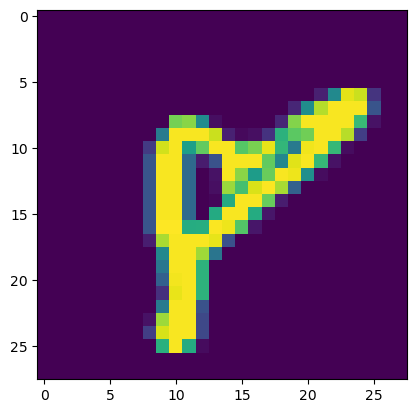

6


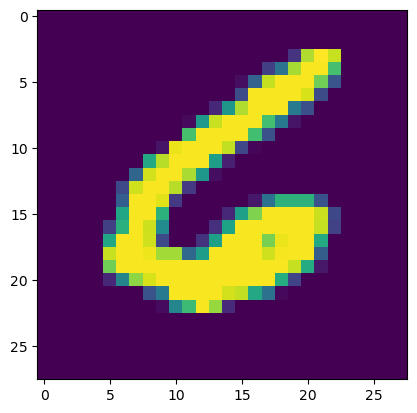

0


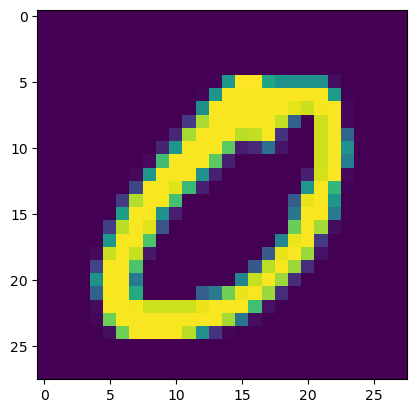

1


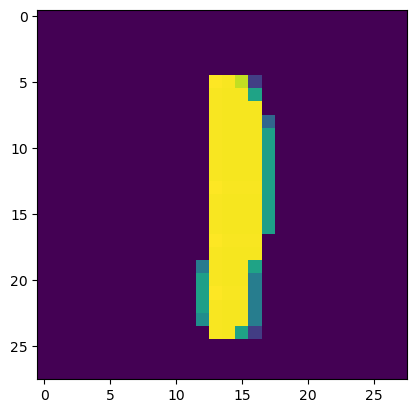

4


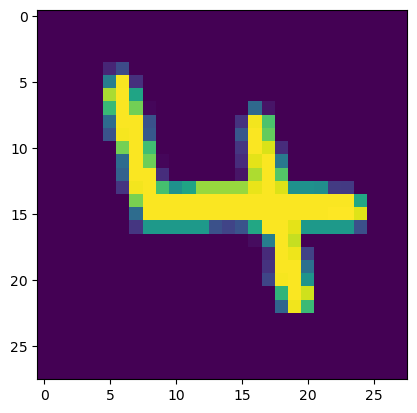

In [31]:
# Explore data
show5(train_loader)

7


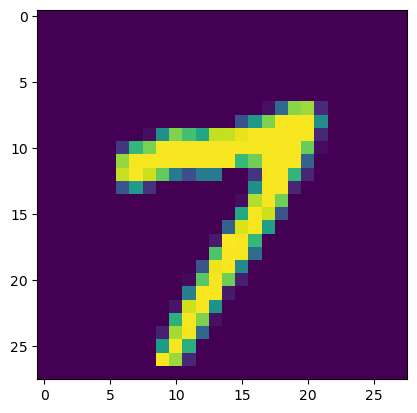

7


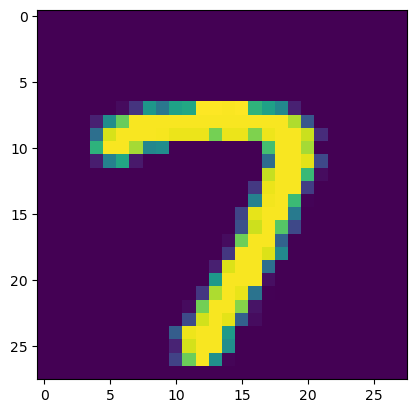

3


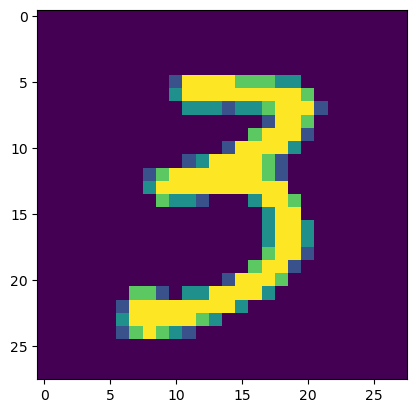

7


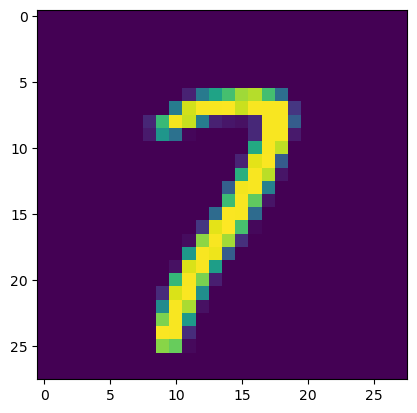

5


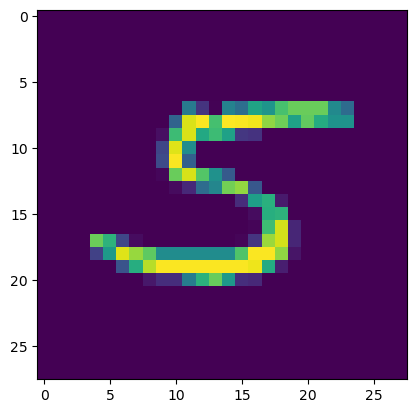

In [32]:
show5(test_loader)

# Step 3

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [33]:
## YOUR CODE HERE ##
input_size = 784 #Tensor's length
hidden_sizes = [128, 64] #Sizes
output_size = 10 #classes

model_1 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model_1)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [34]:
## YOUR CODE HERE ##
#In this case we have 10 classes (Labels). Then, I use a negative log likelihood loss, 
#because it's simple and useful to train a multi-class classification problem.

criterion = nn.NLLLoss() #Define NLL Loss function 

# I use an optimizer based on gradient descendent setting up parameters with a popular configuration 
# (learning rate <0.1, momentum < 1) 
optimizer = optim.SGD(model_1.parameters(), lr=0.05, momentum=0.9)

In [35]:
#Show the backward pass
# print('Before backward pass: \n', model_1[0].weight.grad)
# loss.backward()
# print('After backward pass: \n', model_1[0].weight.grad)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [36]:
## YOUR CODE HERE ##
time0 = time()
epochs = 15

In [37]:
#Run Model
training_epoch_loss = []
for epoch in range(epochs):
    running_loss = 0
    training_step_loss = []
    for images, labels in train_loader:
        # 1st - Highlighting that the MNIST images is flatten (784)
        images = images.view(images.shape[0], -1)
        # 2nd - Training 
        optimizer.zero_grad() #(Clear gradients)
        output = model_1(images) #(Forward pass)
        loss = criterion(output, labels) #(Find the loss)
        # 3rd - Backpropagation 
        loss.backward()
        # 4th - Updating weights
        optimizer.step()
        #Calculating loss
        running_loss += loss.item()
        training_step_loss.append(running_loss)
    else:
        print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)
    training_epoch_loss.append(np.array(training_step_loss).mean())

Epoch 0 - Training loss: 0.5922513756980288

Training Time (in minutes) = 0.09046751260757446
Epoch 1 - Training loss: 0.18406837351144628

Training Time (in minutes) = 0.18213438193003337
Epoch 2 - Training loss: 0.11995628409563226

Training Time (in minutes) = 0.27391141653060913
Epoch 3 - Training loss: 0.09133950731063142

Training Time (in minutes) = 0.3657566587130229
Epoch 4 - Training loss: 0.07325201544197316

Training Time (in minutes) = 0.4601072390874227
Epoch 5 - Training loss: 0.06206239931919473

Training Time (in minutes) = 0.5571680784225463
Epoch 6 - Training loss: 0.051782916161291145

Training Time (in minutes) = 0.6519498229026794
Epoch 7 - Training loss: 0.04326156652433441

Training Time (in minutes) = 0.7536780357360839
Epoch 8 - Training loss: 0.03692662727008475

Training Time (in minutes) = 0.8549364725748698
Epoch 9 - Training loss: 0.030717523692255007

Training Time (in minutes) = 0.9557793060938518
Epoch 10 - Training loss: 0.02559432004122658

Training 

Plot the training loss (and validation loss/accuracy, if recorded).

In [38]:
#Testing Model
validation_epoch_loss=[]
for epoch in range(epochs):
    validation_loss = 0
    for images, labels in test_loader:
        validation_step_loss=[]
        # Validating on test_loader
        images = images.view(images.shape[0], -1)
        output = model_1(images) 
        loss = criterion(output, labels) 
        validation_loss += loss.item()
        validation_step_loss.append(validation_loss)
    validation_epoch_loss.append(np.array(validation_step_loss).mean())

---------- Predicted Digit:  9 ----------


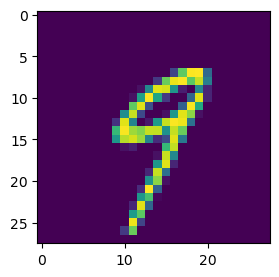

In [39]:
#Validation 
images, labels = next(iter(test_loader))

img = images[np.random.randint(100)].view(1, 784) 
with torch.no_grad():
    logps = model_1(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
fig, ax = plt.subplots(figsize=(3,6))
ax.imshow(img.resize_(1, 28, 28).numpy().squeeze())
print(10*'-',"Predicted Digit: ", probab.index(max(probab)),10*'-')

<function matplotlib.pyplot.show(close=None, block=None)>

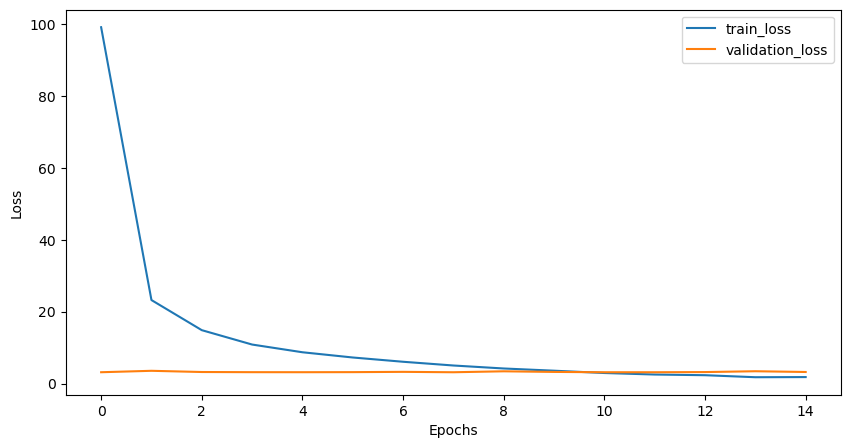

In [40]:
## YOUR CODE HERE ##
plt.figure(figsize=(10,5))
plt.plot(training_epoch_loss, label='train_loss')
plt.plot(validation_epoch_loss,label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [41]:
## YOUR CODE HERE ##
right_count = 0
total_count = 0

for images,labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1, 784) #input size flatten
        with torch.no_grad():
            logps = model_1(img)
            
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    #print(probab)
    pred_label = probab.index(max(probab)) #Highest probability prediction
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        right_count += 1
    total_count += 1

print("Number Of Images Tested =", total_count)
print("\nModel Accuracy =", (right_count/total_count))

Number Of Images Tested = 40

Model Accuracy = 1.0


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [42]:
## YOUR CODE HERE ##
# I decrease the learning rate of the optimizer (0.001) and adding one more hidden layer (ReLu)
# Same number of epochs

In [43]:
hidden_sizes = [256,128, 64] #Sizes

model_2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))

optimizer = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)
print(model_2)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [44]:
#Run Model
training_epoch_loss2 = []
for epoch in range(epochs):
    running_loss = 0
    training_step_loss = []
    for images, labels in train_loader:
        # 1st - Highlighting that the MNIST images is flatten (784)
        images = images.view(images.shape[0], -1)
        # 2nd - Training 
        optimizer.zero_grad() #(Clear gradients)
        output = model_2(images) #(Forward pass)
        loss = criterion(output, labels) #(Find the loss)
        # 3rd - Backpropagation 
        loss.backward()
        # 4th - Updating weights
        optimizer.step()
        #Calculating loss
        running_loss += loss.item()
        training_step_loss.append(running_loss)
    else:
        print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)
    training_epoch_loss2.append(np.array(training_step_loss).mean())


Epoch 0 - Training loss: 2.2974611718603906

Training Time (in minutes) = 1.8465836683909098
Epoch 1 - Training loss: 2.27333798509963

Training Time (in minutes) = 1.9605877677599588
Epoch 2 - Training loss: 2.2199966542264247

Training Time (in minutes) = 2.0704503536224363
Epoch 3 - Training loss: 2.0475766496455416

Training Time (in minutes) = 2.1770646214485168
Epoch 4 - Training loss: 1.5820992464714863

Training Time (in minutes) = 2.288316476345062
Epoch 5 - Training loss: 1.1182830272836888

Training Time (in minutes) = 2.4019508520762125
Epoch 6 - Training loss: 0.8163008545307403

Training Time (in minutes) = 2.513549876213074
Epoch 7 - Training loss: 0.6433551397729427

Training Time (in minutes) = 2.626257228851318
Epoch 8 - Training loss: 0.5533684616393232

Training Time (in minutes) = 2.7391329844792685
Epoch 9 - Training loss: 0.5021550603369449

Training Time (in minutes) = 2.8452852884928386
Epoch 10 - Training loss: 0.46770704502755023

Training Time (in minutes) =

In [45]:
#Testing Model
validation_epoch_loss2=[]
for epoch in range(epochs):
    validation_loss = 0
    for images, labels in test_loader:
        validation_step_loss=[]
        # Validating on test_loader
        images = images.view(images.shape[0], -1)
        output = model_2(images) 
        loss = criterion(output, labels) 
        validation_loss += loss.item()
        validation_step_loss.append(validation_loss)
    validation_epoch_loss2.append(np.array(validation_step_loss).mean())

In [46]:
right_count = 0
total_count = 0

for images,labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1, 784) #input size flatten
        with torch.no_grad():
            logps = model_2(img)
            
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    #print(probab)
    pred_label = probab.index(max(probab)) #Highest probability prediction
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        right_count += 1
    total_count += 1

print("Number Of Images Tested (Model 2) =", total_count)
print("\nModel Accuracy (Model 2) =", (right_count/total_count))

Number Of Images Tested (Model 2) = 40

Model Accuracy (Model 2) = 0.9


---------- Predicted Digit:  1 ----------


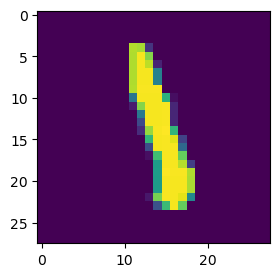

In [47]:
#Validation 
images, labels = next(iter(test_loader))

img = images[np.random.randint(100)].view(1, 784) 
with torch.no_grad():
    logps = model_2(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
fig, ax = plt.subplots(figsize=(3,6))
ax.imshow(img.resize_(1, 28, 28).numpy().squeeze())
print(10*'-',"Predicted Digit: ", probab.index(max(probab)),10*'-')

<function matplotlib.pyplot.show(close=None, block=None)>

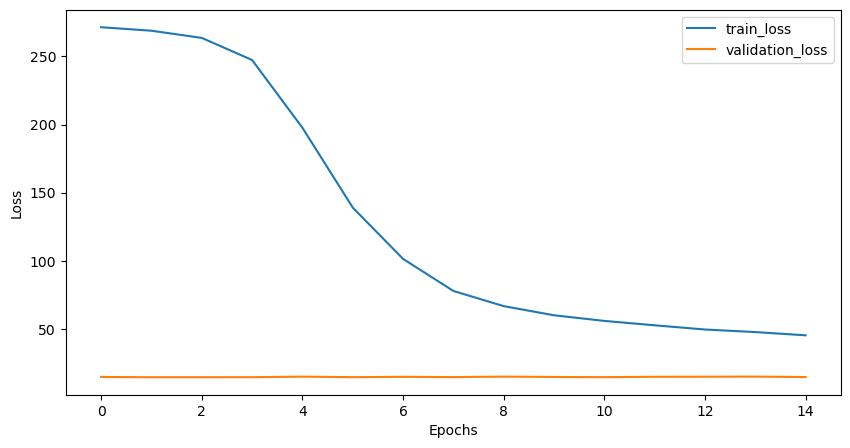

In [48]:
## YOUR CODE HERE ##
plt.figure(figsize=(10,5))
plt.plot(training_epoch_loss2, label='train_loss')
plt.plot(validation_epoch_loss2,label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

## Saving your model
Using `torch.save`, save your model for future loading.

In [49]:
## YOUR CODE HERE ##
torch.save(model_1, './1st_mnist_model_task.pt') 
torch.save(model_2, './2nd_mnist_model_improved.pt') 


References

1. PyTorch Official Docs
2. MNIST Wikipedia
3. GitHub - https://github.com/amitrajitbose/handwritten-digit-recognition